# Part4: Merging the Data and Storing in a Database/Visualizing Data

*Milestone Objective:* This milestone involves merging three cleaned and transformed datasets into a single consolidated dataset, which is stored in an SQL database (such as SQLite, MySQL, or PostgreSQL). Using SQL joins, the datasets are combined to enable comprehensive analysis. The goal is to create five visualizations that showcase insights from the merged data, with at least two visualizations utilizing SQL joins across multiple tables. These visualizations can be generated using Python libraries like Matplotlib or Seaborn, or tools like PowerBI and Tableau. A final write-up will explain the process of merging, storing, and visualizing the data, along with a discussion on the ethical implications of data cleaning.

### Transformation Steps and Code Outline

In [1]:
# Step 1: Exported Cleaned DataFrames from Each Milestone Notebook

# Saved each cleaned DataFrame as a CSV: In each milestone notebook, saved the cleaned DataFrame (the final output of each data wrangling process) as a CSV file. 
# This will allow to easily load each dataset into the SQLite database for merging.
# Below is the code used for saving DataFrame in each milestone notebook
# healthcare_data.to_csv("cleaned_healthcare_data.csv", index=False)
# population_data.to_csv("cleaned_population_data.csv", index=False)
# weather_data.to_csv("cleaned_weather_data.csv", index=False)

In [2]:
# Step 2: Load Datasets into a Consolidated Notebook

In [3]:
# Import Necessary Libraries
import pandas as pd

# Load the cleaned data from each milestone into dataframes
healthcare_data = pd.read_csv("cleaned_healthcare_data.csv")
population_data = pd.read_csv("cleaned_population_data.csv")
weather_data = pd.read_csv("cleaned_weather_data.csv")

In [4]:
healthcare_data.head()

,index,address,city,state,zip_code,county_name,measure_name,measure_id,compared_to_national,denominator,score,lower_estimate,higher_estimate,measure_start_date,measure_end_date,location
0,0,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,Rate of readmission after discharge from hospi...,READM_30_HOSP_WIDE,No Different than the National Rate,438,13.9,12.6,15.6,2014-07-01,2015-06-30,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,..."
1,1,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,150,4.0,2.8,5.7,2012-07-01,2015-06-30,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00..."
2,2,1100 SOUTH VAN DYKE ROAD,BAD AXE,MI,48413,HURON,Pneumonia (PN) 30-Day Readmission Rate,READM_30_PN,No Different than the National Rate,205,16.7,13.8,19.9,2012-07-01,2015-06-30,"1100 SOUTH VAN DYKE ROAD\nBAD AXE, MI 48413\n(..."
3,3,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,Rate of readmission for stroke patients,READM_30_STK,No Different than the National Rate,67,11.5,8.7,14.9,2012-07-01,2015-06-30,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00..."
4,4,825 N CENTER AVE,GAYLORD,MI,49735,OTSEGO,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,102,13.4,9.9,17.7,2012-07-01,2015-06-30,"825 N CENTER AVE\nGAYLORD, MI 49735\n(45.03537..."


In [5]:
# Renamed the state long description column to 'statedesc' and the state abbreviation column to 'state' for consistency across all three datasets, 
# as both columns relate to state information.
population_data = population_data.rename(columns={'state': 'state_desc','state_code': 'state'})

In [6]:
population_data.head()

,state_desc,population,land_area_(sq_mi),density_(people_per_sq_mi),state
0,California,38803000,155779.03,249.1,CA
1,Texas,26957000,261231.59,103.2,TX
2,Florida,19893000,53624.55,371.0,FL
3,New York,19746000,47126.45,419.0,NY
4,Illinois,12881000,55518.76,232.0,IL


In [7]:
# Renamed the state long description column to 'statedesc' and the state abbreviation column to 'state' for consistency across all three datasets, 
# as both columns relate to state information.
weather_data = weather_data.rename(columns={'StateDesc': 'state_desc','State': 'state'})

In [8]:
weather_data.head()

,state_desc,state,Humidity (%),Weather Description,Air Quality Index,Temperature (F),Temperature Category
0,Alabama,AL,70,Clear Sky,Good,41.324,Cool
1,Alaska,AK,55,Overcast Clouds,Good,49.406,Cool
2,Arizona,AZ,88,Overcast Clouds,Good,61.052,Warm
3,Arkansas,AR,60,Clear Sky,Fair,47.552,Cool
4,California,CA,84,Light Rain,Fair,49.478,Cool


In [9]:
# Step 3: Load Each CSV into SQLite:

In [10]:
# Set Up SQLite Connection:
import sqlite3

# Connect to SQLite database (or create one if it doesn’t exist)
conn = sqlite3.connect("final_project.db")


In [11]:
#: Insert data into these tables from DataFrames
healthcare_data.to_sql("healthcare", conn, if_exists="append", index=False)
population_data.to_sql("population", conn, if_exists="append", index=False)
weather_data.to_sql("weather", conn, if_exists="append", index=False)


47

In [12]:
# Step 4: Perform SQL Joins to Merge Data

In [13]:
# Perform SQL Joins:
# Sample SQL join to merge tables on state
query = """
SELECT *
FROM healthcare h
JOIN population p ON h.state = p.state
JOIN weather w ON h.state = w.state 
"""
merged_data = pd.read_sql_query(query, conn)


In [14]:
# Drop duplicate 'state' columns
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Verify the columns after dropping duplicates
print(merged_data.columns)

Index(['index', 'address', 'city', 'state', 'zip_code', 'county_name',
       'measure_name', 'measure_id', 'compared_to_national', 'denominator',
       'score', 'lower_estimate', 'higher_estimate', 'measure_start_date',
       'measure_end_date', 'location', 'state_desc', 'population',
       'land_area_(sq_mi)', 'density_(people_per_sq_mi)', 'Humidity (%)',
       'Weather Description', 'Air Quality Index', 'Temperature (F)',
       'Temperature Category'],
      dtype='object')


In [15]:
# Verify the merged DataFrame to ensure all relevant columns are included and the merge was successful.
merged_data.head()

,index,address,city,state,zip_code,county_name,measure_name,measure_id,compared_to_national,denominator,...,location,state_desc,population,land_area_(sq_mi),density_(people_per_sq_mi),Humidity (%),Weather Description,Air Quality Index,Temperature (F),Temperature Category
0,0,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,Rate of readmission after discharge from hospi...,READM_30_HOSP_WIDE,No Different than the National Rate,438,...,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,...",Michigan,9910000,56538.85,175.3,82,Clear Sky,Good,45.122,Cool
1,1,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,150,...,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00...",Michigan,9910000,56538.85,175.3,82,Clear Sky,Good,45.122,Cool
2,2,1100 SOUTH VAN DYKE ROAD,BAD AXE,MI,48413,HURON,Pneumonia (PN) 30-Day Readmission Rate,READM_30_PN,No Different than the National Rate,205,...,"1100 SOUTH VAN DYKE ROAD\nBAD AXE, MI 48413\n(...",Michigan,9910000,56538.85,175.3,82,Clear Sky,Good,45.122,Cool
3,3,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,Rate of readmission for stroke patients,READM_30_STK,No Different than the National Rate,67,...,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00...",Michigan,9910000,56538.85,175.3,82,Clear Sky,Good,45.122,Cool
4,4,825 N CENTER AVE,GAYLORD,MI,49735,OTSEGO,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,102,...,"825 N CENTER AVE\nGAYLORD, MI 49735\n(45.03537...",Michigan,9910000,56538.85,175.3,82,Clear Sky,Good,45.122,Cool


### Visualizations

The visualizations section aims to provide a clear, data-driven perspective on the relationship between environmental, demographic, and healthcare factors across various U.S. states. After consolidating data from multiple sources—demographic data, healthcare readmission rates, and environmental indicators—into a single database, I created five visualizations to highlight key insights and patterns. 

##### 1. Top 10 States by Average Humidity

Data Source: This plot is based on environmental data from the weather API.

This visualization focuses on humidity levels across states. By calculating the average humidity for each state and selecting the top 10 states, I was able to observe which areas experience higher humidity. Humidity is considered an environmental factor that may correlate with health outcomes, which is why it is included in this analysis. Also the horizontal bar format makes it easy to compare values across states.

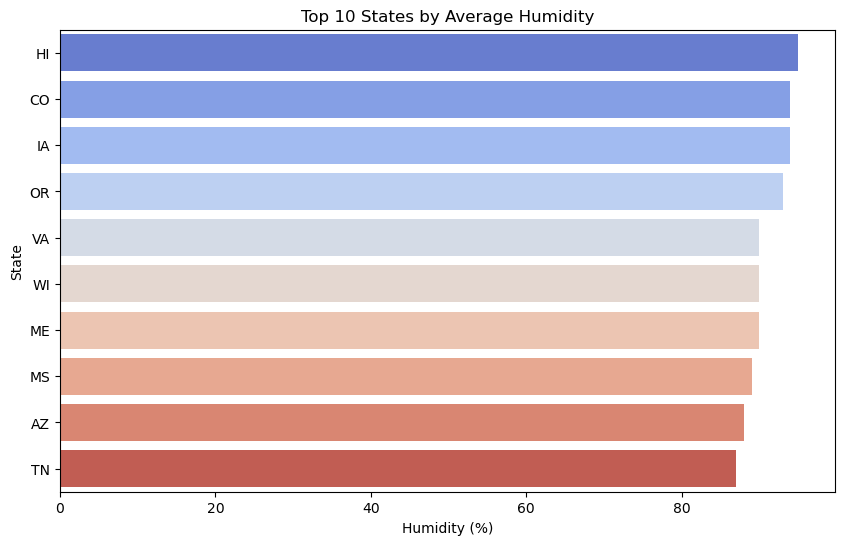

In [16]:
# Horizontal Bar Plot: Top 10 States by Average Humidity
# Calculates the average humidity for each state, then selects the top 10 states by humidity.
# Plots a horizontal bar chart showing the humidity percentage for each of these top states.

import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'state' and get the top N (10) states by average humidity
top_n = 10
top_states = merged_data.groupby('state')['Humidity (%)'].mean().nlargest(top_n).index

# Filter the DataFrame for these top states
filtered_data = merged_data[merged_data['state'].isin(top_states)]

# Sort the filtered data by Humidity in descending order
filtered_data = filtered_data.sort_values(by='Humidity (%)', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='Humidity (%)', y='state', hue='state', palette='coolwarm', dodge=False, legend=False)

plt.title(f'Top {top_n} States by Average Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('State')

# Show the plot
plt.show()

##### 2. Top 10 States with Highest Healthcare Readmission Rates

Data Source: This plot uses healthcare data sourced from a flat file. 

This plot shows the states with the highest average readmission rates. Focusing on readmission rates can help identify states with potential healthcare quality issues or higher patient risks. This plot was derived by filtering data specifically related to readmissions and calculating mean readmission rates for each state.

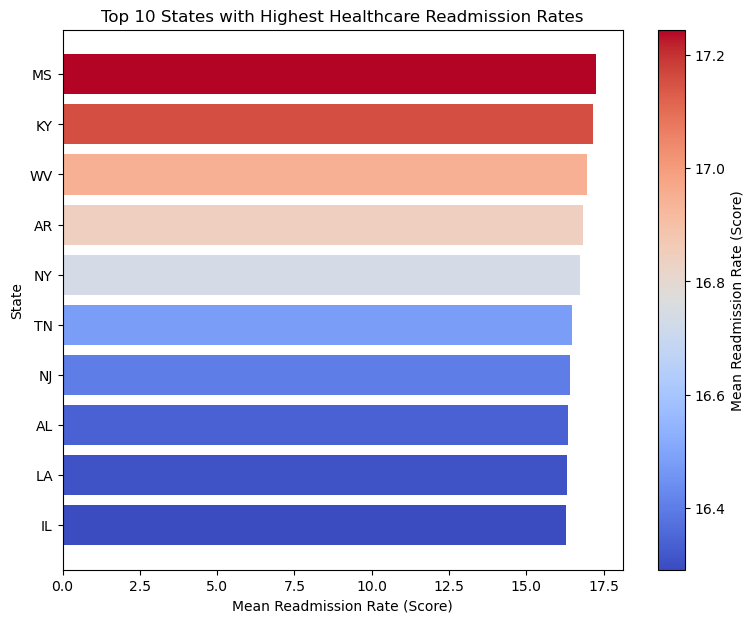

In [17]:
# Top 10 States with Highest Healthcare Readmission Rates
# Filter Readmission Data: Select rows where measure_id starts with 'READM' to focus on readmission-related records.
# Clean Score Data: Convert the score column to numeric, removing rows with NaN values.
# Calculate Mean by State: Group by state and compute the mean readmission rate (score) for each state.
# Sort and Select Top 10: Sort states by readmission rate and keep the top 10.
# Create Horizontal Bar Plot 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for rows where measure_id starts with 'READM' These are the readmission records
readmission_data = merged_data[merged_data['measure_id'].str.startswith('READM')].copy()

# Ensure 'score' column is numeric, coercing errors to NaN
readmission_data['score'] = readmission_data['score'].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in the 'score' column
readmission_data = readmission_data.dropna(subset=['score'])

# Calculate the mean score (readmission rate) by state
readmission_by_state = readmission_data.groupby('state')['score'].mean().reset_index()

# Sort the states by readmission rate (score) in descending order
readmission_by_state = readmission_by_state.sort_values(by='score', ascending=False)

# Select the top 10 states with the highest readmission rates
top_10_readmission_by_state = readmission_by_state.head(10)

# Create a horizontal bar plot to compare readmission rates by state with hue based on score
fig, ax = plt.subplots(figsize=(10, 6))  # Use subplots to get the axes for colorbar

# Normalize the score for hue coloring
norm = plt.Normalize(top_10_readmission_by_state['score'].min(), top_10_readmission_by_state['score'].max())

# Create the horizontal bar plot with color map for hue based on score
bars = ax.barh(
    top_10_readmission_by_state['state'], 
    top_10_readmission_by_state['score'], 
    color=plt.cm.coolwarm(norm(top_10_readmission_by_state['score']))
)

# Add labels and title
ax.set_xlabel('Mean Readmission Rate (Score)')
ax.set_ylabel('State')
ax.set_title('Top 10 States with Highest Healthcare Readmission Rates')

# Increase space between bars
plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.05)

# Invert y-axis to display bars from high to low
plt.gca().invert_yaxis()

# Add a colorbar to indicate the color mapping for the scores
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # to avoid the "no data" warning
cbar = plt.colorbar(sm, ax=ax)  # Associate the colorbar with the axes
cbar.set_label('Mean Readmission Rate (Score)')

# Show the plot
plt.show()


##### 3. Top 10 States with the Highest Population Density

Data Source: This plot is derived from demographic data obtained from website. 

In this visualization, states are ranked based on their population density. Population density serves as a demographic factor that might affect healthcare outcomes, as densely populated areas tend to have different health service demands and resource constraints compared to less populated regions.

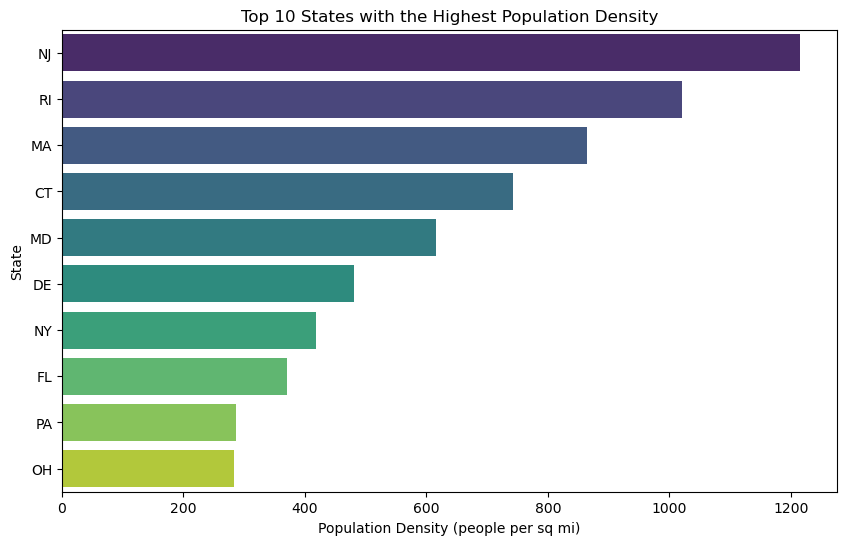

In [18]:
# Top 10 States with the Highest Population Density
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the states by population density in descending order
top_10_dense_states = population_data.nlargest(10, 'density_(people_per_sq_mi)')

# Create a bar plot for the top 10 states with the highest population density
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_dense_states,
    y='state',  # States on the y-axis
    x='density_(people_per_sq_mi)',  # Population density on the x-axis
    hue='state',  # Use hue for color differentiation
    palette='viridis',  # Color palette for the bars
    legend=False  # Disable the legend as it's unnecessary here
)

# Add labels and title
plt.title('Top 10 States with the Highest Population Density')
plt.xlabel('Population Density (people per sq mi)')
plt.ylabel('State')

# Show the plot
plt.show()

##### 4. Healthcare Readmission Score by Air Quality (Top 10 States)

Data Sources: This visualization uses combined healthcare data (from the flat file) and air quality data (from the weather API). 

This plot examines the relationship between healthcare readmission rates and air quality. By isolating the top states based on readmission scores and evaluating their average air quality, I aimed to explore if areas with poorer air quality tend to have higher readmission rates.

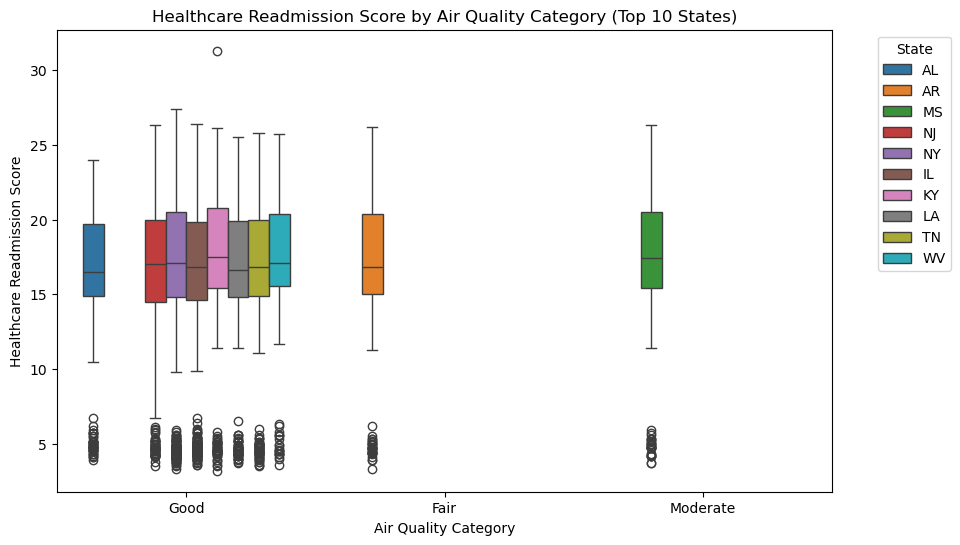

In [19]:
# Healthcare Readmission Score by Air Quality (Top 10 States)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop duplicate 'state' columns and keep only one
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Convert 'score' column to numeric if it’s not already
merged_data['score'] = pd.to_numeric(merged_data['score'], errors='coerce')

# Filter data for readmission scores
readmission_data = merged_data[merged_data['measure_id'].str.startswith("READM")]

# Calculate average readmission score by state and select the top 10 states with the highest average readmission score
top_10_states = (
    readmission_data.groupby('state')['score']
    .mean()
    .nlargest(10)
    .index
)

# Filter the dataset to include only the top 10 states
top_10_data = readmission_data[readmission_data['state'].isin(top_10_states)]

# Plot the box plot for top 10 states with hue as 'Air Quality Index'
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=top_10_data,
    x='Air Quality Index',   # Air Quality as a categorical variable
    y='score',               # Readmission score
    hue='state',             # Color by state
    palette='tab10'
)

plt.title('Healthcare Readmission Score by Air Quality Category (Top 10 States)')
plt.xlabel('Air Quality Category')
plt.ylabel('Healthcare Readmission Score')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### 5. Population Density vs. Temperature Across top 10 States

Data Sources: This scatter plot uses merged dataset that has demographic data (from the website) and environmental data (from the weather API).

This scatter plot visualizes the relationship between population density and temperature across selected states. This visualization allows us to observe patterns between demographic and environmental factors, potentially highlighting how population characteristics align with climate conditions.

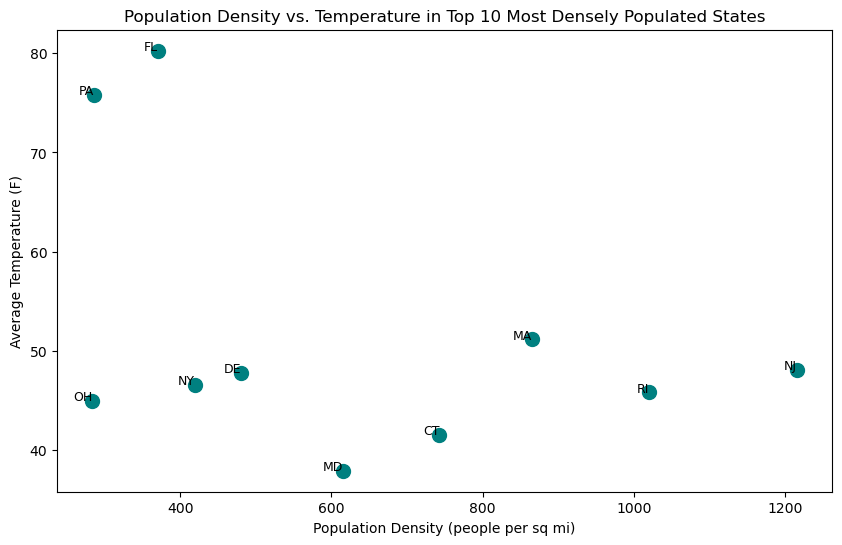

In [20]:
# Population Density vs. Temperature Across States

# Select top 10 states by population density
top_density_states = merged_data.groupby('state')['density_(people_per_sq_mi)'].mean().nlargest(10).index
density_temp_data = merged_data[merged_data['state'].isin(top_density_states)]

# Calculate average temperature and population density for each state
density_temp_avg = density_temp_data.groupby('state').agg({
    'density_(people_per_sq_mi)': 'mean',
    'Temperature (F)': 'mean'
}).reset_index()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(density_temp_avg['density_(people_per_sq_mi)'], density_temp_avg['Temperature (F)'], color='teal', s=100)
plt.title('Population Density vs. Temperature in Top 10 Most Densely Populated States')
plt.xlabel('Population Density (people per sq mi)')
plt.ylabel('Average Temperature (F)')

# Annotate points with state names
for i, row in density_temp_avg.iterrows():
    plt.annotate(row['state'], (row['density_(people_per_sq_mi)'], row['Temperature (F)']), fontsize=9, ha='right')

plt.show()


**Visualization  Summary:**

Based on the above plots we can infer the following about the influence of environmental and demographic factors on U.S. healthcare readmissions:

*Environmental Factors:*

Air Quality: Poorer air quality is associated with higher readmission rates, suggesting that air pollution contributes to respiratory and cardiovascular health problems.

Humidity: States with higher average humidity may have higher readmission rates due to the exacerbation of respiratory and cardiovascular conditions.

*Demographic Factors:*

Population Density: While not a direct correlation, densely populated areas can face challenges related to air quality, noise pollution, and access to green spaces, which can impact public health.

State-Level Variations: The significant variation in readmission rates across states suggests that factors beyond environmental and demographic factors, such as socioeconomic disparities and healthcare access, play a crucial role.

It's important to note that these are preliminary inferences based on a limited set of plots. A more comprehensive analysis would require considering additional factors and data to draw definitive conclusions.

**Project Summary:**

In this project, I explored how environmental and demographic factors, such as humidity, air quality, and population density, relate to healthcare readmission rates across the U.S. 
This work required merging data from diverse sources, including demographic information, healthcare statistics, and environmental data into a cohesive dataset. The project involved several key tasks: data collection, data cleaning, integration, analysis, and visualization.

Throughout the process, I learned the importance of meticulous data cleansing and transformation. Each dataset required attention to detail, from standardizing formats to handling missing values, to ensure compatibility when merging them into a single database. Handling data from varied sources—flat files, web datasets, and APIs—presented unique challenges, particularly in managing different structures, updating data in real-time, and aligning data types across sources. Using three distinct datasets, each focused on one of these domains, I created a consolidated view of the data by importing each dataset into an SQLite database as a separate table and performing SQL joins. This allowed me to analyze connections across datasets, making it possible to visualize trends and relationships that might influence healthcare readmissions.

The five visualizations generated reflect multiple perspectives on the data, each providing insight into different factors potentially contributing to healthcare outcomes. These visualizations include the top states by humidity and readmission rates, population density, and air quality, as well as a comparison of population density versus temperature. These plots were chosen to explore potential associations between healthcare readmissions and external factors, such as whether high-humidity states or regions with poor air quality show elevated healthcare utilization.

Throughout this project, the importance of ethical data handling and cleansing became evident. Ensuring the accuracy and consistency of the data was essential to avoid misleading interpretations. For example, handling missing or incorrect values incorrectly could produce flawed results that misrepresent the underlying trends. Beyond technical correctness, there is an ethical responsibility to represent the data honestly, as any errors in this analysis could misinform healthcare policy or contribute to biased conclusions. A significant part of this project involved standardizing the data, performing quality checks, and ensuring transparency in each step of the data processing pipeline.

The ethical considerations extend to interpreting and presenting results responsibly. While these visualizations provide valuable insights, they do not establish causation. Any correlations observed should not be interpreted as direct evidence of environmental or demographic factors causing higher readmission rates. Additionally, using sensitive healthcare data for analysis requires careful handling to protect patient privacy and avoid perpetuating healthcare disparities through biased interpretations.

In summary, this project has highlighted the complexities of data integration from multiple sources and underscored the need for ethical standards in data analysis. Although this analysis is limited by the available data and its observational nature, it provides a basis for further research into how environmental and demographic factors could influence healthcare outcomes. Future studies might benefit from expanding the dataset to include more detailed regional healthcare policies or socio-economic factors for a more comprehensive view. This foundational analysis emphasizes the potential for multi-dimensional data to uncover meaningful patterns, while also calling for careful and ethical handling of data to ensure that conclusions are both accurate and fair.

In [ ]:
# # Define the query to drop the table
# drop_table_query = "DROP TABLE IF EXISTS healthcare"  # Replace 'table_name' with the actual table name

# # Execute the query
# conn.execute(drop_table_query)

# drop_table_query = "DROP TABLE IF EXISTS population"  # Replace 'table_name' with the actual table name
# conn.execute(drop_table_query)
# drop_table_query = "DROP TABLE IF EXISTS weather"  # Replace 'table_name' with the actual table name
# conn.execute(drop_table_query)
# # Commit the changes
# conn.commit()

# # Close the connection
# conn.close()